# Gradient descent principles
### By Qijun Jin and Johnny

# Funcions per fer plot

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

def plot_1d(X, Y, fig):
    ax = fig.gca()
    line, = ax.plot(X, Y)
    ax.grid(True)

def plot_2d(X, Y, Z, fig, transparent=False):
    # Surface plot 3D + contour plot
    ax = fig.gca(projection='3d')
    if transparent:
        ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
    else:
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        
    ax.contour(X,Y,Z,30,zdir='z',offset=0)

def plot_gradient(X, Y, grad, fig):
    fig = fig
    ax = fig.gca()
    for x,y,g in zip(X, Y, grad):
        ax.arrow(x = x, y = y, dx = g, dy = 0, 
                  head_width = 0.3, head_length=0.4, fc='black', ec='black')
            
def plot_gradient_descend_1d(f, X, points, minimum, fig):
    plot_1d(X, f(X), fig)
    ax = fig.gca()
    ax.scatter(points, f(points), c='black')
    ax.plot(points, f(points), c='black')
    
def plot_gradient_descend_2d(f, grad, X, Y, points, minimum, fig):
    project_gradient(f, grad, fig, contour=30)
    ax = fig.gca()
    ax.scatter(points[:, 0], points[:, 1], c='black')
    ax.plot(points[:, 0], points[:, 1], c='black')
    
def generate_grid(function, axisX=[-2, 2, 0.05], axisY=[-2, 2, 0.05]):
    # Function to analyze
    X = np.arange(axisX[0], axisX[1], axisX[2])
    Y = np.arange(axisY[0], axisY[1], axisY[2])
    X, Y = np.meshgrid(X, Y)
    Z = function(X, Y)    
    return X, Y, Z

# Plot of the gradient
def project_gradient(f, grad_f, fig, contour=50):
    X, Y, Z = generate_grid(function = f)
    gradx, grady = grad_f(X,Y)
    ax = fig.gca()
    ax.contour(X, Y, Z, contour)
    ax.streamplot(X, Y, gradx, grady)

# 1 Gradient descent methods

### 1.1 A simple quadratic function

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<Figure size 432x288 with 0 Axes>

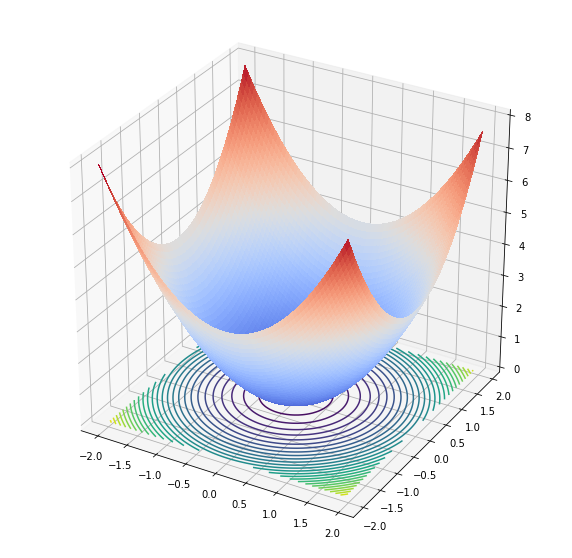

In [2]:
def function( x, y ):
    return x**2 + y**2

def grad_function(x, y=None):
    return np.asarray((2 * x, 2 * y))

if __name__ == '__main__':
    # Surface to plot
    fig = plt.figure()
    fig = plt.figure(figsize=(10,10))
    X, Y, Z = generate_grid(function)
    plot_2d(X, Y, Z, fig)

###### Gradient descent function

In [3]:
def gradient_descend_2d(gradient, x, alpha=0.1, eps=1e-6, max_iter=1000, verbose=True):
    i = 0
    l = list()
    while i < max_iter:
        l.append((x))
        if np.all(abs(alpha * gradient(x[0], x[1])) > eps):
            x = x - alpha * gradient(x[0],x[1])
            i += 1
        else:
            break
    if verbose:
        print(len(l))
        print("Iterations: ", i)
        return np.array(l), np.array(l[-1])
    else: 
        return np.array(l), np.array(l[-1])

### 1.1.1.1 Implement starting point (1,1), step as 0.1 and iterations as 100

56
Iterations:  55
Minimum:  [0. 0.]


<Figure size 432x288 with 0 Axes>

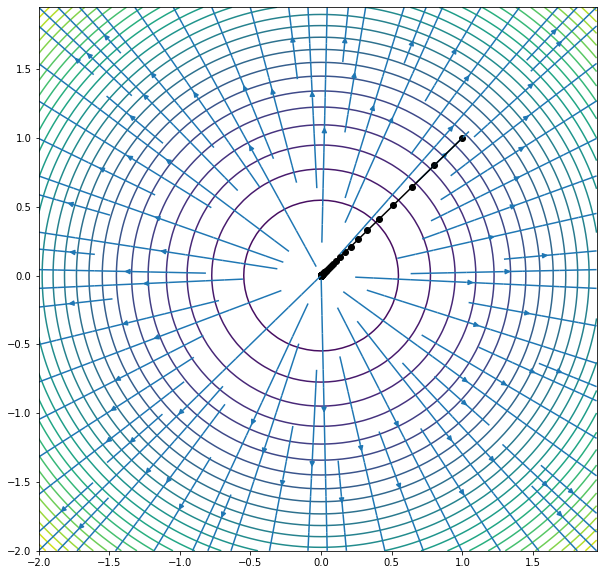

In [4]:
x0 = np.asarray([1, 1])
points, minimum = gradient_descend_2d(grad_function, x0, max_iter=100)
print ("Minimum: ", np.round(minimum,3))
fig = plt.figure()
fig = plt.figure(figsize=(10,10))
X, Y, _ = generate_grid(function)
plot_gradient_descend_2d(function, grad_function, X, Y, points, minimum, fig)

###### We can see that choosing the step as 0.1 converges the convex function to the minimum point (0,0)

### Implementation with different starting point x0 with more iterations (1000)

56
Iterations:  55
Minimum:  [-0.  0.]


<Figure size 432x288 with 0 Axes>

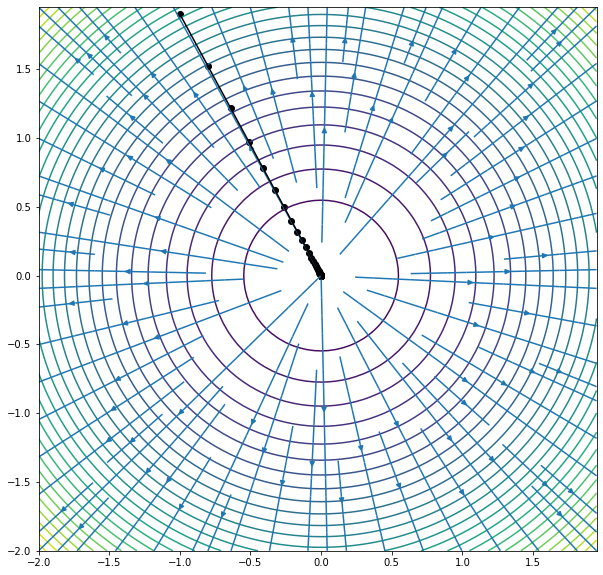

In [5]:
x0 = np.asarray([-1, 1.9])
points, minimum = gradient_descend_2d(grad_function, x0, max_iter = 1000)
print ("Minimum: ", np.round(minimum,3))
fig = plt.figure()
fig = plt.figure(figsize=(10,10))
X, Y, _ = generate_grid(function)
plot_gradient_descend_2d(function, grad_function, X, Y, points, minimum, fig)

###### By choosing different starting point, we can also observe that the algorithm converge to the minimum

### 1.1.1.2 Implement starting point (1,1), step as 1 and iterations as 100

100
Iterations:  100
Minimum:  [-1 -1]


<Figure size 432x288 with 0 Axes>

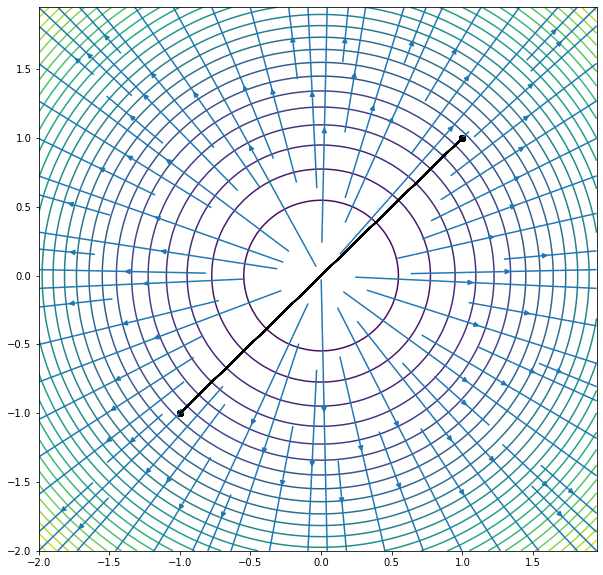

In [6]:
x0 = np.asarray([1, 1])
points, minimum = gradient_descend_2d(grad_function, x0, alpha=1, max_iter = 100)
print ("Minimum: ", np.round(minimum,3))
fig = plt.figure()
fig = plt.figure(figsize=(10,10))
X, Y, _ = generate_grid(function)
plot_gradient_descend_2d(function, grad_function, X, Y, points, minimum, fig)

###### As the image shown, selecting step as 1 does not converge to the minimum, because the step is too much for the convex function to reach to the minimum point

###### Our consideration is to choose the step as 0.1 which is one of the optimal value.

### 1.2 A more complex function

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<Figure size 432x288 with 0 Axes>

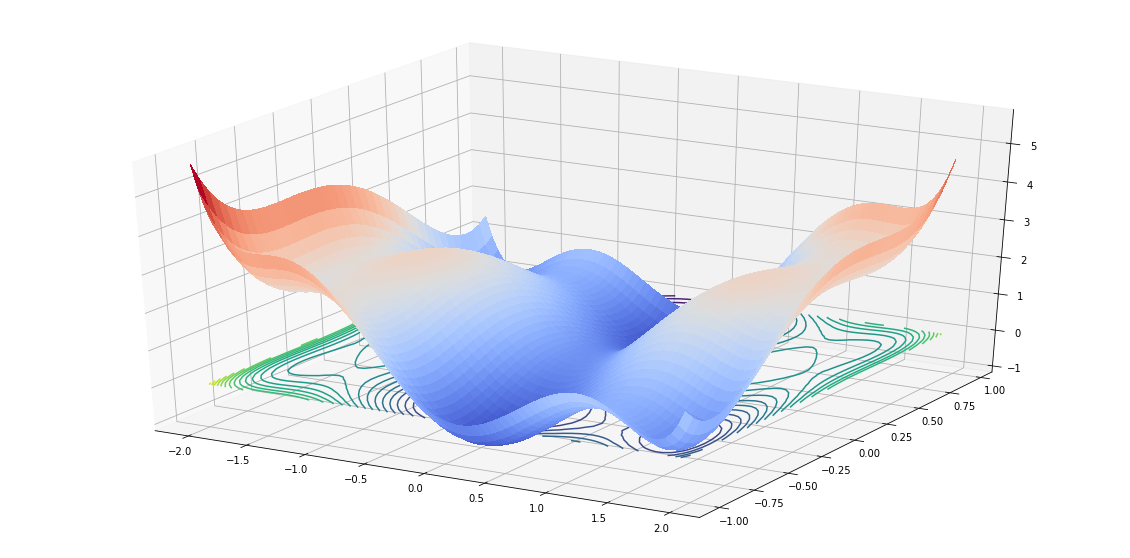

In [7]:
def function( x, y ):
    return np.multiply(x**2,(4-2.1* x**2 + (1./3)*x**4)) + np.multiply(x,y)+ np.multiply((y**2),(-4+4*y**2))

def grad_function(x, y=None):
    return np.asarray((8*x-8.4*(x**3)+2*(x**5)+y , x - 8*y + 16*(y**3)))

if __name__ == '__main__':
    # Surface to plot
    fig = plt.figure()
    fig = plt.figure(figsize=(20,10))
    X, Y, Z = generate_grid(function, axisX=[-2, 2, 0.05], axisY=[-1, 1, 0.05])
    plot_2d(X, Y, Z, fig)

### 1.2.1 Implementation with step = 0.1 and 100 iterations

27
Iterations:  26
Minimum:  [-0.09   0.713]


<Figure size 432x288 with 0 Axes>

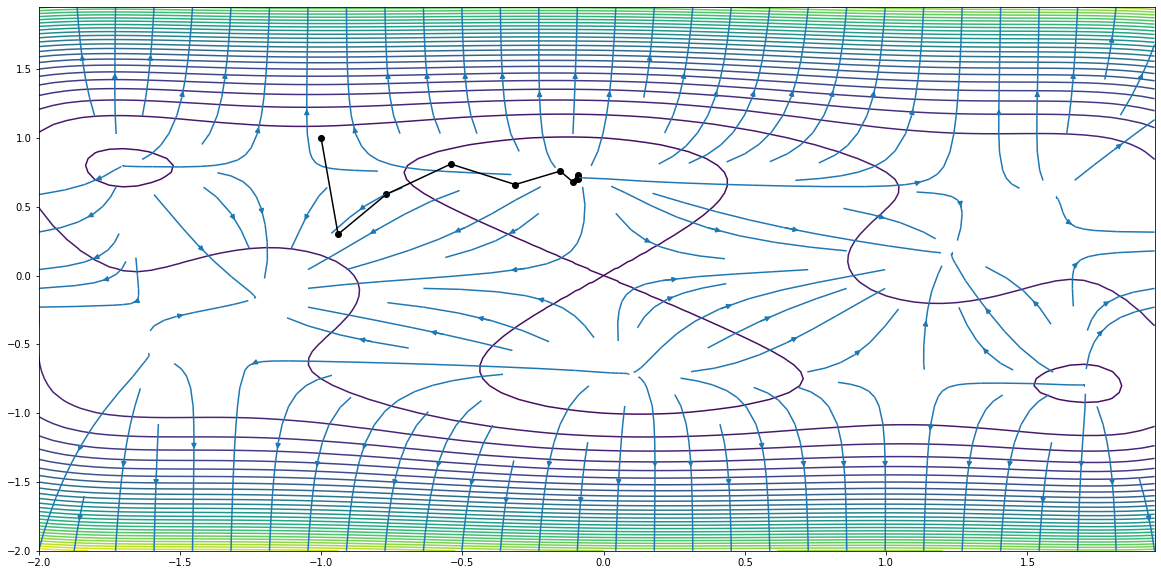

In [8]:
x0 = np.asarray([-1,1])
points, minimum = gradient_descend_2d(grad_function, x0, alpha=0.1 , max_iter=100)
print ("Minimum: ", np.round(minimum,3))
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
X, Y, _ = generate_grid(function)
plot_gradient_descend_2d(function, grad_function, X, Y, points, minimum, fig)

###### The algorithm converge to the minimum point of the valley which it belongs to (not necessary the minimum of the function, it may be the local minimum)

### Implementation with different starting point x0 with 100 iterations

28
Iterations:  27
Minimum:  [-0.09   0.713]


<Figure size 432x288 with 0 Axes>

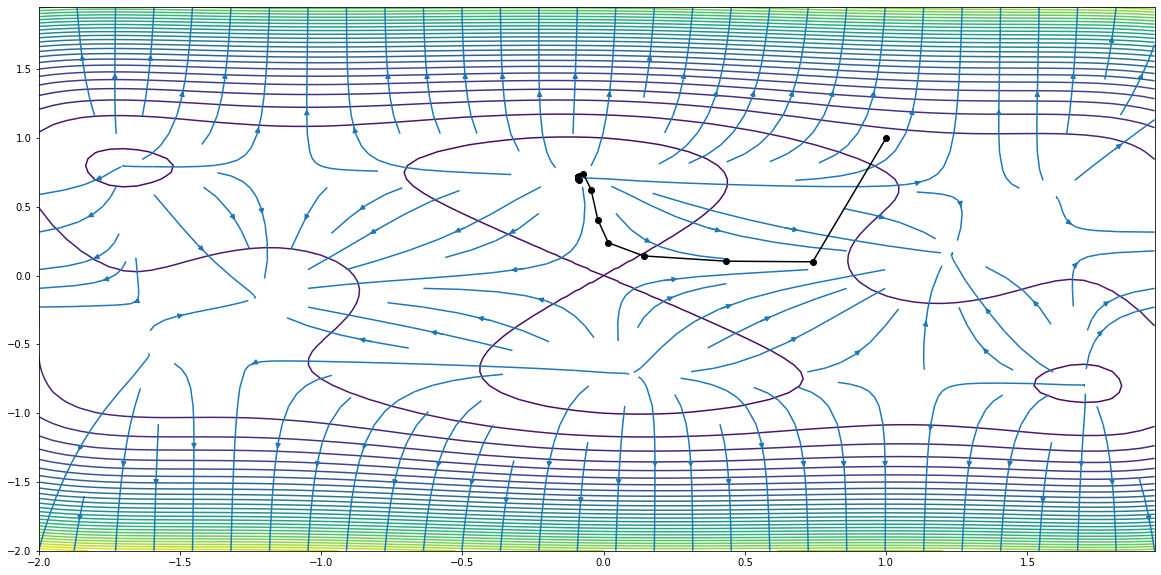

In [9]:
x0 = np.asarray([1,1])
points, minimum = gradient_descend_2d(grad_function, x0, alpha=0.1 , max_iter=100)
print ("Minimum: ", np.round(minimum,3))
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
X, Y, _ = generate_grid(function)
plot_gradient_descend_2d(function, grad_function, X, Y, points, minimum, fig)

###### The algorithm converge to the minimum point of the valley which it belongs to (not necessary the minimum of the function, it may be the local minimum)

### 1.2.2 Improvement of the algorithm with no constant step

###### Gradient descent function with adaptive step

In [10]:
def gradient_descend_2d_auto(f, gradient, x, eps=1e-6, max_iter=1000, initial_alpha=1, verbose=True):
    i = 0
    l = list()
    l.append((x))
    alpha = initial_alpha
    while i < max_iter:
        if np.all(abs(alpha * gradient(x[0], x[1])) > eps):
            x_orig = x
            x = x - alpha * gradient(x[0],x[1])
            if(f(x[0],x[1])>f(x_orig[0],x_orig[1])):
                alpha = alpha/2
                x = x_orig
            else:
                alpha = initial_alpha
                l.append((x))
                i += 1
        else:
            break
    if verbose:
        print(len(l))
        print(i)
        return np.array(l), np.array(l[-1])
    else: 
        return np.array(l), np.array(l[-1])

### 1.2.2.1 Implementation with adaptive step gradient descent

11
10
Minimum:  [ 0.09  -0.713]


<Figure size 432x288 with 0 Axes>

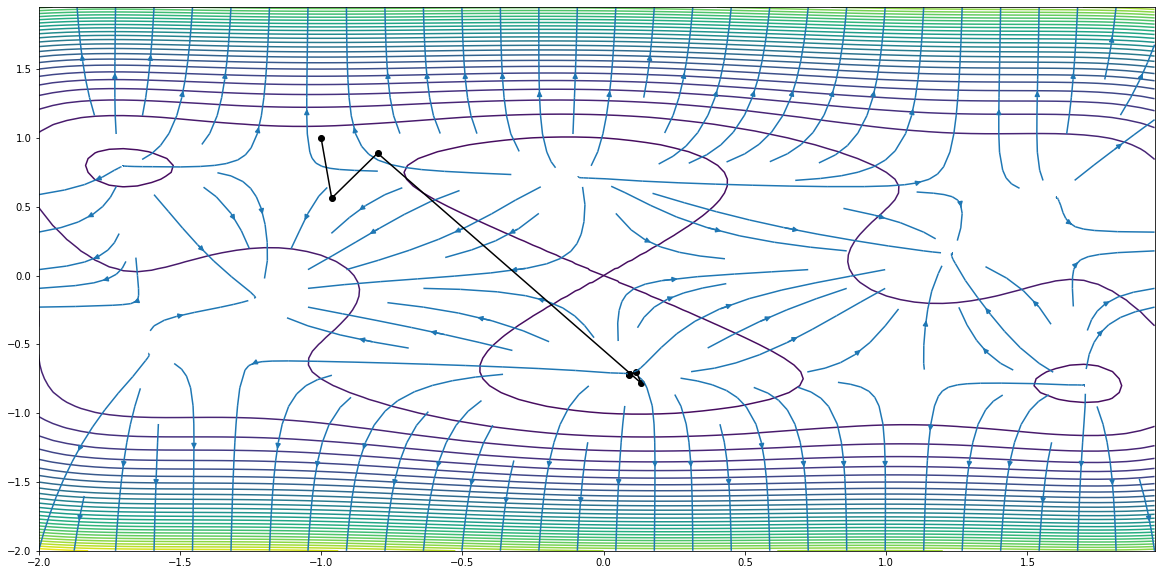

In [11]:
x0 = np.asarray([-1,1])
points, minimum = gradient_descend_2d_auto(function, grad_function, x0, initial_alpha=1 , max_iter=1000)
print ("Minimum: ", np.round(minimum,3))
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
X, Y, _ = generate_grid(function)
plot_gradient_descend_2d(function, grad_function, X, Y, points, minimum, fig)

###### Q: How does the algorithm perform?
###### A: The algorithm performs well as it can reach to the minimum point (maybe local) of the function

###### Q: Compare the results with the results you have obtained with a constant step. 
###### A: In compare with the constant step one, it find another minimum point of the function

###### Q: How many iterations are needed to find the minimum? 100? Or may be less? 
###### A: In compare with the constant step one, it need less iterations. With constant step it needs 26 iterations and with adaptive step it needs 10 iterations


### Second version of the adaptive step gradient descent method without max_iter attribute

In [12]:
def gradient_descend_2d_auto_v2(f, gradient, x, eps=1e-6, initial_alpha=1, verbose=True):
    i = 0
    l = list()
    l.append((x))
    alpha = initial_alpha
    while True:
            x_orig = x
            x = x - alpha * gradient(x[0],x[1])
            if np.abs(f(x[0],x[1])-f(x_orig[0],x_orig[1])) > eps:
              if (f(x[0],x[1])>f(x_orig[0],x_orig[1])):
                  alpha = alpha/2
                  x = x_orig
              else:
                  alpha = initial_alpha
                  l.append((x))
                  i += 1
            else:
              break
    if verbose:
        print(len(l))
        print("Iterations: ", i)
        return np.array(l), np.array(l[-1])
    else: 
        return np.array(l), np.array(l[-1])

6
Iterations:  5
Minimum:  [ 0.09  -0.725]


<Figure size 432x288 with 0 Axes>

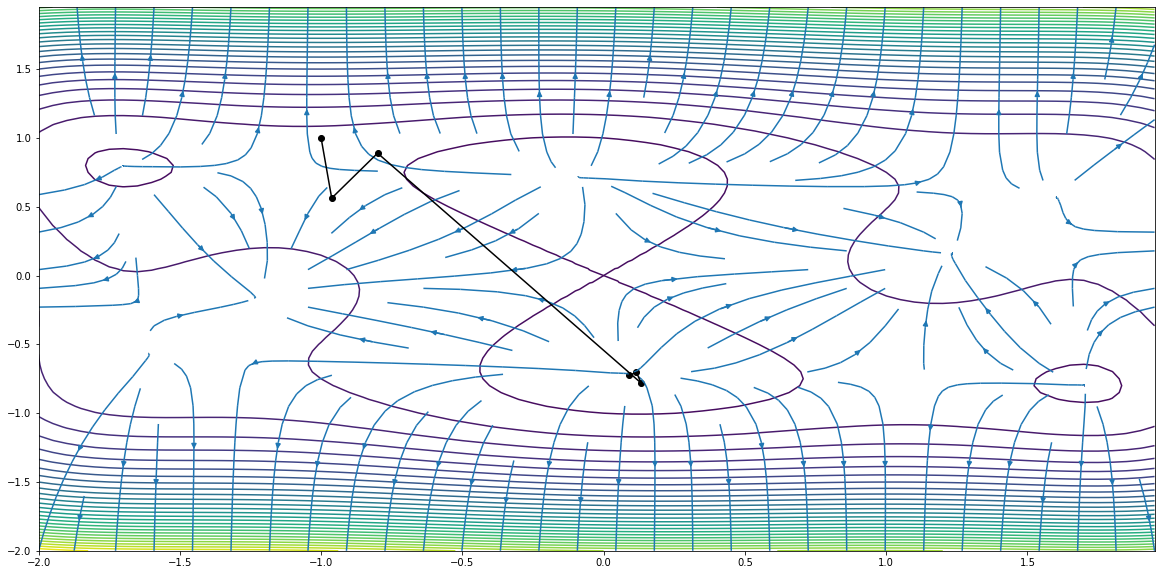

In [13]:
x0 = np.asarray([-1,1])
points, minimum = gradient_descend_2d_auto_v2(function, grad_function, x0, initial_alpha=1, eps = 1e-3)
print ("Minimum: ", np.round(minimum,3))
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
X, Y, _ = generate_grid(function)
plot_gradient_descend_2d(function, grad_function, X, Y, points, minimum, fig)

###### By using this algorithm with eps = 1e-3, it finds the minimum with only 5 steps

### 1.3 The Rosenbrock function

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<Figure size 432x288 with 0 Axes>

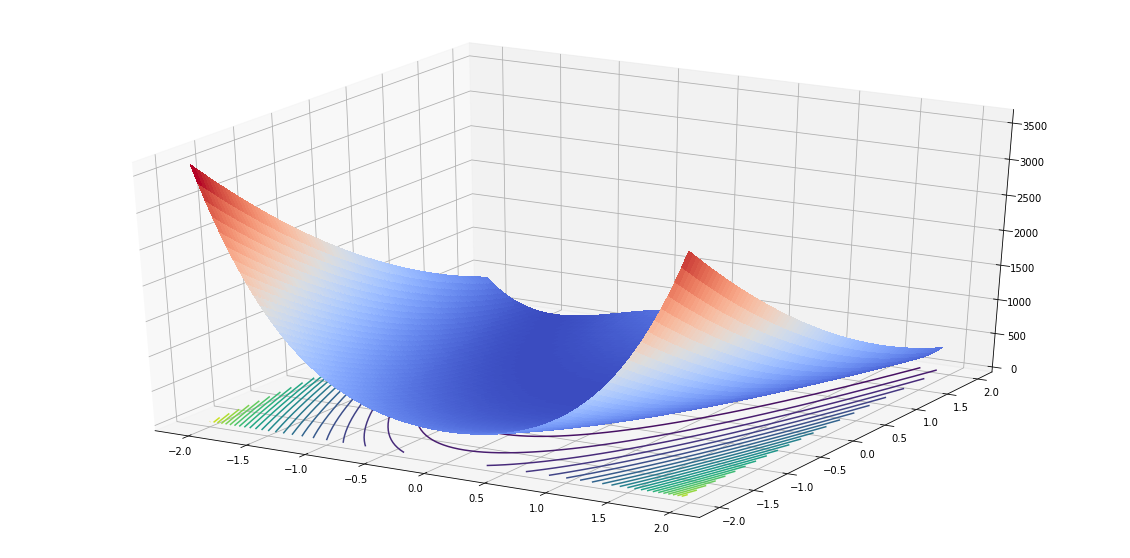

In [14]:
A_ROS = 1
B_ROS = 100
def f_ros(x, y, a=A_ROS, b=B_ROS):
    return (a-x)**2 + b*(y-x**2)**2

def grad_f_ros(x, y, a=A_ROS, b=B_ROS):
    return np.asarray((-2*a + 4*b*x**3 - 4*b*x*y + 2*x, 2*b*(y-x**2)))

if __name__ == '__main__':
    # Surface to plot
    fig = plt.figure()
    fig = plt.figure(figsize=(20,10))
    X, Y, Z = generate_grid(f_ros)
    plot_2d(X, Y, Z, fig)

### 1.3.1 Minimum of the Rosenbrock function

<Figure size 432x288 with 0 Axes>

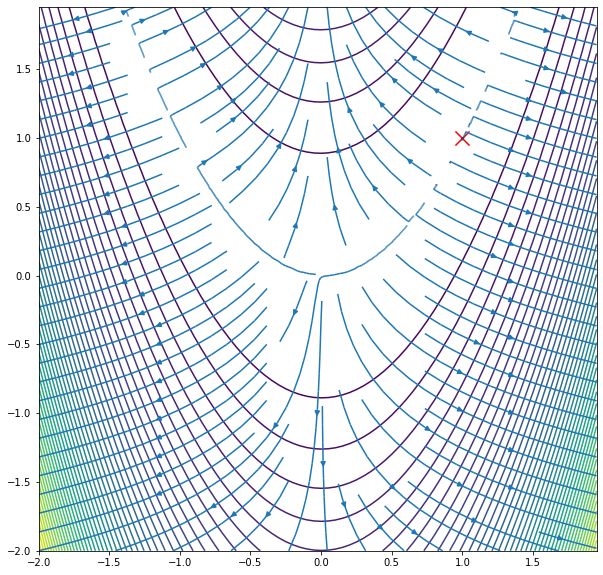

In [15]:
fig = plt.figure()
fig = plt.figure(figsize=(10,10))
project_gradient(f_ros, grad_f_ros, fig)
plt.scatter(A_ROS, A_ROS**2, marker='x', color='r', s=200)

### 1.3.2 Implementation with adaptive step gradient descent

216
215
[0.9602006  0.92198746]


<Figure size 432x288 with 0 Axes>

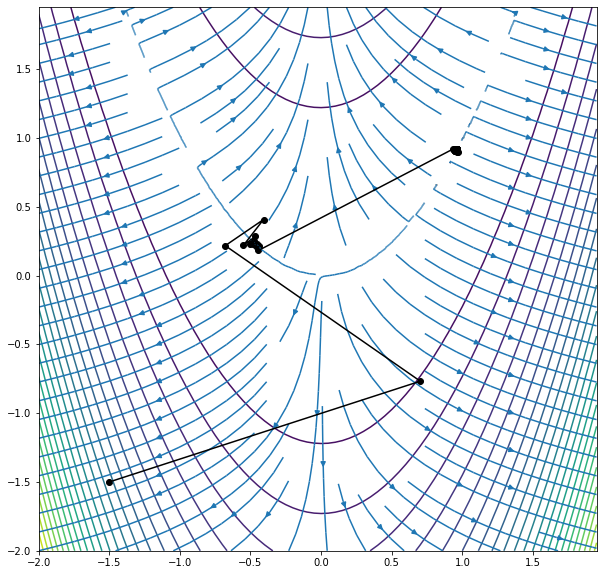

In [16]:
fig = plt.figure()
fig = plt.figure(figsize=(10,10))
x0 = np.asarray((-1.5, -1.5))
points, minimum = gradient_descend_2d_auto(f_ros, grad_f_ros, x0, max_iter=10000)
X, Y, _ = generate_grid(f_ros)
plot_gradient_descend_2d(f_ros, grad_f_ros, X, Y, points, minimum, fig)
print(minimum)

###### Q: How many iterations are performed until the stopping criterion is satisfied?
###### A: We can observe that the algorithm converges to the minimum of the function within 215 iterations. But this algorithm is not efficient as there are too many iterations concentrated at the final valley. It is because that the algorithm does not have a good direction to find the minimum. It jumps from one side to the other side of the valley without taking into account the shape of the valley

###### Q: Is the algorithm able to reach the minimum? 
###### A: Yes, it does reach to the minimum

# 2 Newton descent method


### 2.1 A simple quadratic function

In [17]:
def function(x, y):
  return 100 * x**2 + y**2

def grad_function(x, y):
    return np.array((200 * x, 2 * y))

def hessian(x, y):
    return np.array([[200, 0],[0, 2]])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<Figure size 432x288 with 0 Axes>

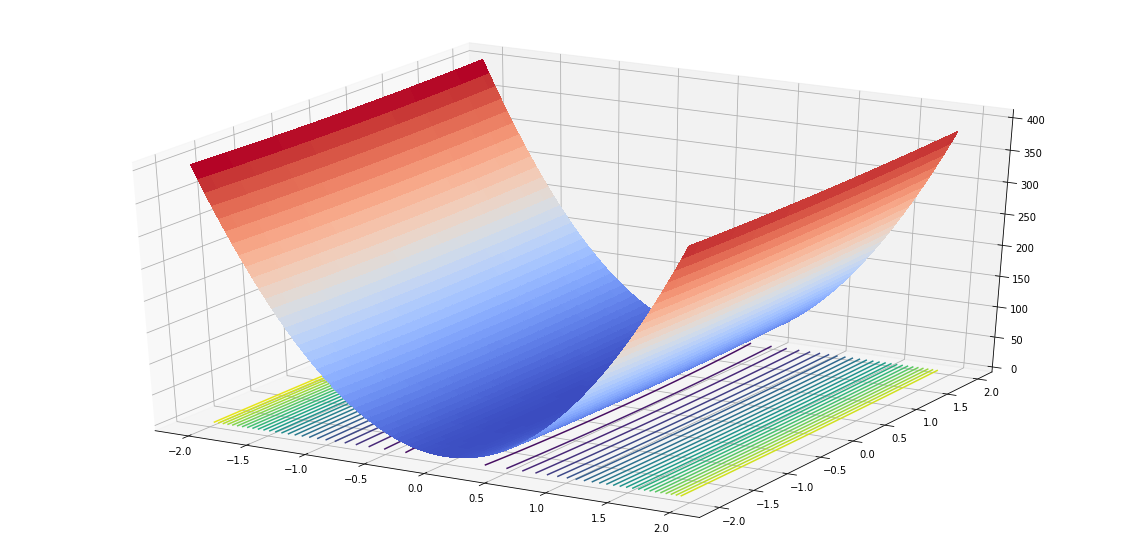

In [18]:
if __name__ == '__main__':
    # Surface to plot
    fig = plt.figure()
    fig = plt.figure(figsize=(20,10))
    X, Y, Z = generate_grid(function)
    plot_2d(X, Y, Z, fig)

### 2.1.1 Experiment using adaptive step gradient descent method

194
Iterations:  193
Minimum:  [-0.     0.025]


<Figure size 432x288 with 0 Axes>

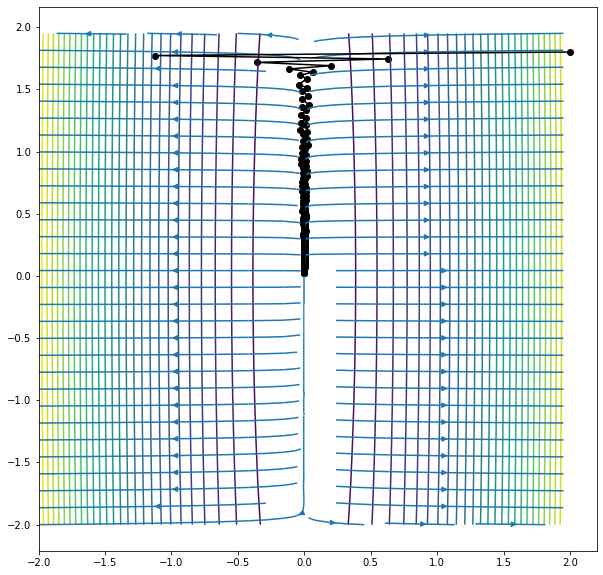

In [19]:
x0 = np.asarray([2,1.8])
points, minimum = gradient_descend_2d_auto_v2(function, grad_function, x0, initial_alpha=1)
print ("Minimum: ", np.round(minimum,3))
fig = plt.figure()
fig = plt.figure(figsize=(10,10))
X, Y, _ = generate_grid(function)
plot_gradient_descend_2d(function, grad_function, X, Y, points, minimum, fig)

###### We can observe that the algorithm converges to the minimum of the function within 193 iterations. But this algorithm is not efficient as there are too many iterations concentrated at the final valley. It is because that the algorithm does not have a good direction to find the minimum

### Newton descent method

In [20]:
def newton_direction(b, H):
  return np.linalg.solve(H, -b)

def gradient_descend_2d_auto_newton(f, grad, x, H, eps=1e-6, initial_alpha=1, verbose=True):

    i = 0
    l = list()
    l.append((x))
    alpha = initial_alpha
    x_orig = x
    derivative = grad(x[0], x[1])

    while (np.abs(f((x_orig - alpha*derivative)[0], (x_orig - alpha*derivative)[1])- f(x_orig[0],x_orig[1])) > eps or np.linalg.norm(derivative) > eps) and alpha > eps:
            derivative = grad(x_orig[0], x_orig[1])
            hessian = H(x_orig[0], x_orig[1])

            x = x_orig + alpha * newton_direction(derivative, hessian)

            if (f(x[0],x[1]) >= f(x_orig[0],x_orig[1])):
                  alpha = alpha/2
            else:
                  alpha = initial_alpha
                  x_orig = x
                  l.append((x))
                  i += 1
                
    if verbose:
        print(len(l))
        print("Iterations: ", i)
        return np.array(l), np.array(l[-1])
    else: 
        return np.array(l), np.array(l[-1])

### 2.1.2 & 2.1.3 Experiment using newton descent method

2
Iterations:  1
Minimum:  [0. 0.]


<Figure size 432x288 with 0 Axes>

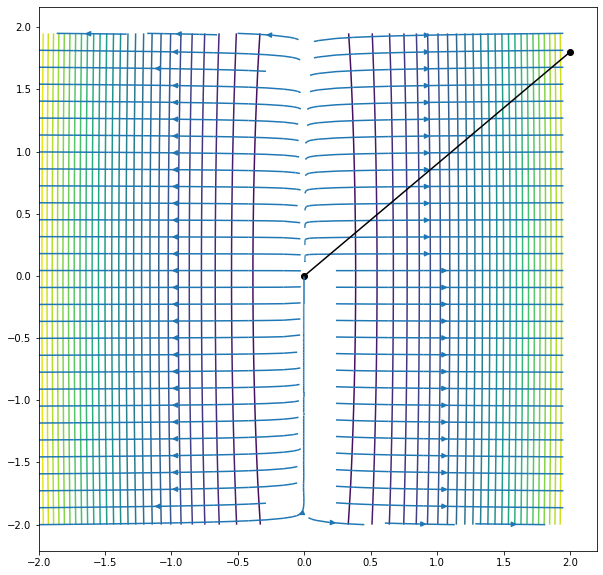

In [21]:
x0 = np.asarray([2, 1.8])
points, minimum = gradient_descend_2d_auto_newton(function, grad_function, x0, hessian, initial_alpha=1)
print ("Minimum: ", np.round(minimum,3))
fig = plt.figure()
fig = plt.figure(figsize=(10,10))
X, Y, _ = generate_grid(function)
plot_gradient_descend_2d(function, grad_function, X, Y, points, minimum, fig)

###### As the function is a convex plane, the point obtained by using the second order derivative with step as 1 coincides with the minimum (line of points) of the function.

###### Q: Compare the number of iterations that are needed to get to the minimum. It may also be interesting to plot the path that each of the method follows.
###### A: In compare with the adaptive step gradient descent, it need less iterations. With adaptive step gradient descent it needs 193 iterations and with newton descent it needs 1 iterations (considering step as 1)

# 2.2 A more complex function

In [22]:
def function(x, y):
    return np.multiply(x**2,(4-2.1* x**2 + (1./3)*x**4)) + np.multiply(x,y)+ np.multiply((y**2),(-4+4*y**2))

def grad_function(x, y=None):
    return np.asarray((8*x-8.4*(x**3)+2*(x**5)+y , x - 8*y + 16*(y**3)))

def hessian(x, y):
    Hxx=8-25.2*x**2+10*x**4
    Hxy=1
    Hyx=1
    Hyy=-8+48*y**2
    return np.array([[Hxx, Hxy],[Hyx,Hyy]])

### 2.2.1 Recover the experiment of gradient descent method

7
Iterations:  6
Minimum:  [ 0.09  -0.712]


<Figure size 432x288 with 0 Axes>

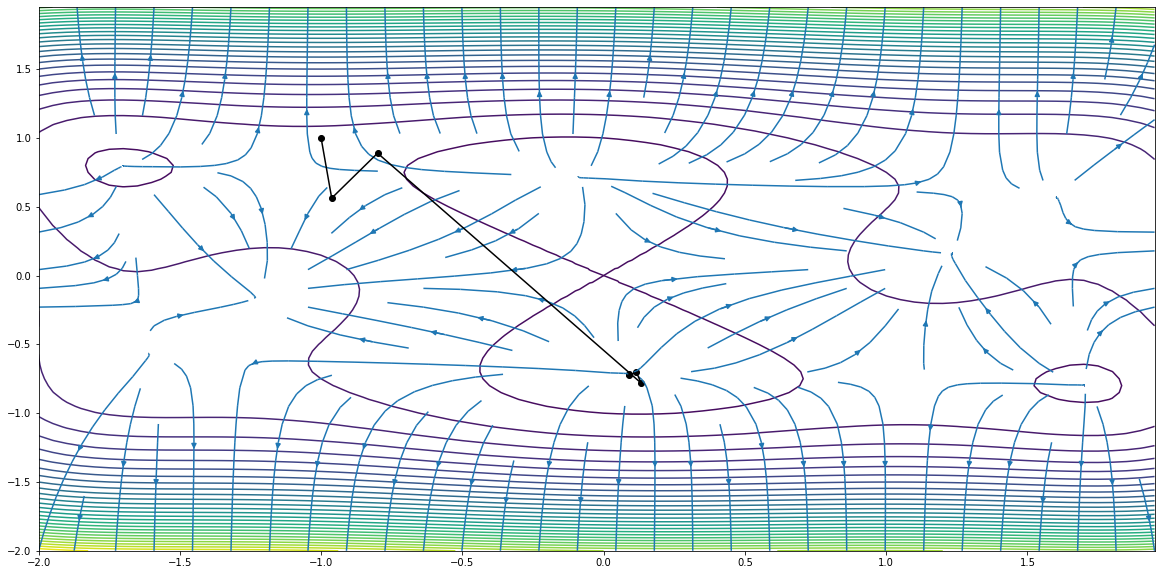

In [23]:
x0 = np.asarray([-1, 1])
points, minimum = gradient_descend_2d_auto_v2(function, grad_function, x0, initial_alpha = 1)
print ("Minimum: ", np.round(minimum,3))
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
X, Y, _ = generate_grid(function)
plot_gradient_descend_2d(function, grad_function, X, Y, points, minimum, fig)

###### It needs 6 iterations to reach to the minimum

### 2.2.2 Newton descent method

6
Iterations:  5
Minimum:  [-1.109  0.768]


<Figure size 432x288 with 0 Axes>

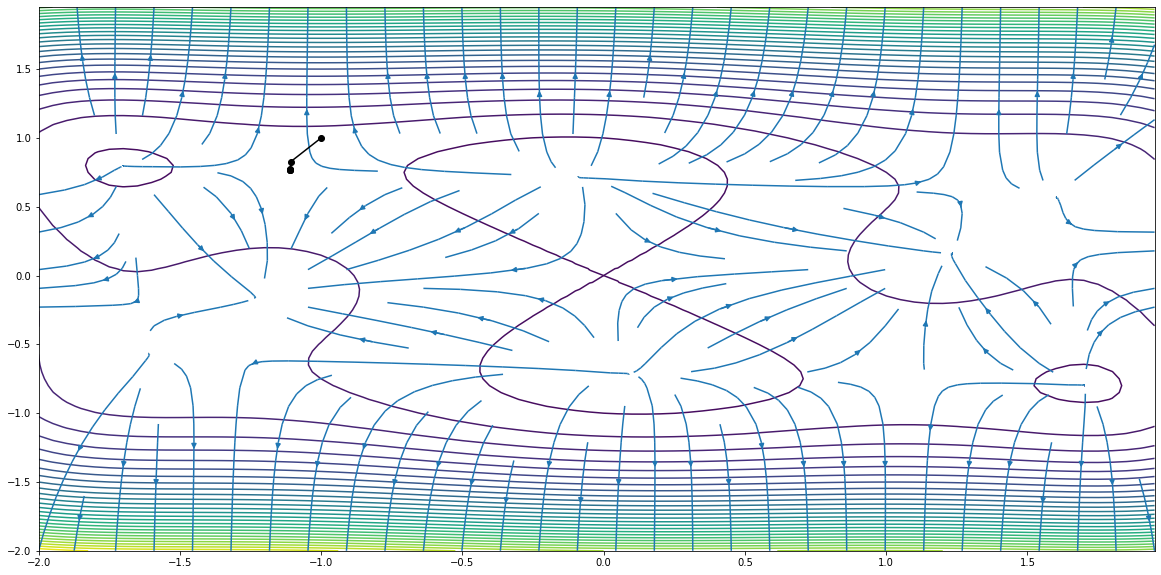

In [24]:
x0 = np.asarray([-1, 1])
points, minimum = gradient_descend_2d_auto_newton(function, grad_function, x0, hessian, initial_alpha = 1)
print ("Minimum: ", np.round(minimum,3))
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
X, Y, _ = generate_grid(function)
plot_gradient_descend_2d(function, grad_function, X, Y, points, minimum, fig)

###### We can observe that the algorithm does not converge to the minumum (maybe local) of the funcion. In this image, we can see that the algorithm reaches to the maximum (maybe local) of the function.

###### The Hessian matrix gives us the information of the convexity. As if Hessian is positive definite at x, then ​​f reaches a local minimum at x. If Hessian is negative definite at x, then f reaches a local maximum at x. If Hessian has positive and negative eigenvalues, then x is the saddle point of f. Otherwise the condition is uncertain. This means that at the local minimum (or local maximum), the Hessian is positive semi-definite (or negative semi-definite).

### 2.2.3 Newton-gradient descent method

In [25]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [26]:
def gradient_descend_2d_auto_hessian(f, grad, x, H, eps=1e-5, initial_alpha=1, verbose=True):
    
    i = 0
    l = list()
    d = dict()
    l.append((x))
    d[str(x[0])+'/'+str(x[1])] = 'go'
    alpha = initial_alpha
    x_orig = x
    derivative = grad(x[0], x[1])

    while (np.abs(f((x_orig - alpha*derivative)[0], (x_orig - alpha*derivative)[1]) - f(x_orig[0], x_orig[1])) > eps or np.linalg.norm(derivative)) and alpha > eps:

            derivative = grad(x_orig[0], x_orig[1])
            hessian = H(x_orig[0], x_orig[1])

            if is_pos_def(hessian):

              x = x_orig + alpha * newton_direction(derivative, hessian)

              if f(x[0],x[1]) >= f(x_orig[0],x_orig[1]):

                    alpha = alpha/2

              else:
                  
                    alpha = initial_alpha
                    x_orig = x
                    l.append((x))
                    d[str(x[0])+'/'+str(x[1])] = 'go'
                    i += 1
                    
            else:

              x = x_orig - alpha * derivative

              if f(x[0],x[1]) >= f(x_orig[0],x_orig[1]):

                    alpha = alpha/2

              else:
                    alpha = initial_alpha
                    x_orig = x
                    l.append((x))
                    d[str(x[0])+'/'+str(x[1])] = 'ro'
                    i += 1

    if verbose:
        print(len(l))
        print("Iterations: ", i)
        return np.array(l), np.array(l[-1]), d
    else: 
        return np.array(l), np.array(l[-1]), d

In [27]:
def plot_gradient_descend_2d_v2(f, grad, X, Y, points, minimum, d, fig):
    project_gradient(f, grad, fig, contour=30)
    ax = fig.gca()
    ax.scatter(points[:, 0], points[:, 1], c='black')
    ax.plot(points[:, 0], points[:, 1], c='black')
    for i in d:
      p = i.split("/")
      x = np.float(p[0])
      y = np.float(p[1])
      plt.plot(x, y, d[i])

8
Iterations:  7
Minimum:  [ 0.09  -0.713]


<Figure size 432x288 with 0 Axes>

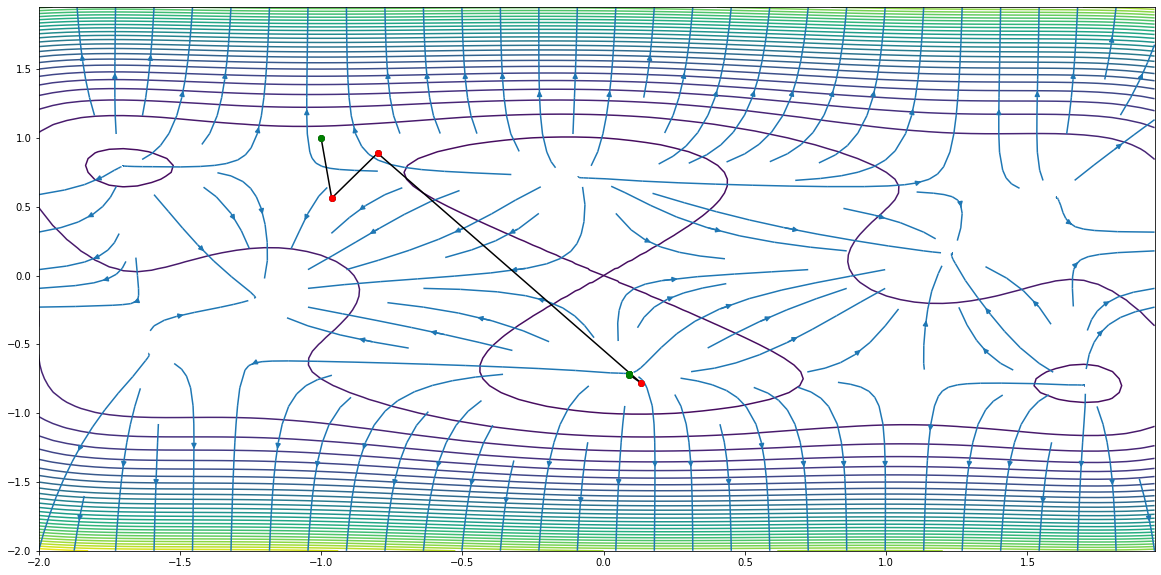

In [28]:
x0 = np.asarray([-1, 1])
points, minimum, d = gradient_descend_2d_auto_hessian(function,grad_function, x0, hessian, initial_alpha=1)
print ("Minimum: ", np.round(minimum,3))
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
X, Y, _ = generate_grid(function)
plot_gradient_descend_2d_v2(function, grad_function, X, Y, points, minimum, d, fig)

###### As we can see at the image, the red dots are used for gradient descent, and the green dots are used for Newton method. It reaches to the minimum in 7 iterations

# 2.3 The Rosenbrock function

In [29]:
A_ROS = 1
B_ROS = 100
def f_ros(x, y, a=A_ROS, b=B_ROS):
    return (a-x)**2 + b*(y-x**2)**2

def grad_f_ros(x, y, a=A_ROS, b=B_ROS):
    return np.asarray((-2*a + 4*b*x**3 - 4*b*x*y + 2*x, 2*b*(y-x**2)))

def hessian_ros(x, y, a=A_ROS, b=B_ROS):
    Hxx= 2-4*b*y+12*b*x**2 
    Hxy=-4*b*x
    Hyx=-4*b*x
    Hyy=2*b
    return np.array([[Hxx, Hxy],[Hyx,Hyy]])

### 2.3.1 Gradient descent method

43
Iterations:  42
[0.95299645 0.90789388]


<Figure size 432x288 with 0 Axes>

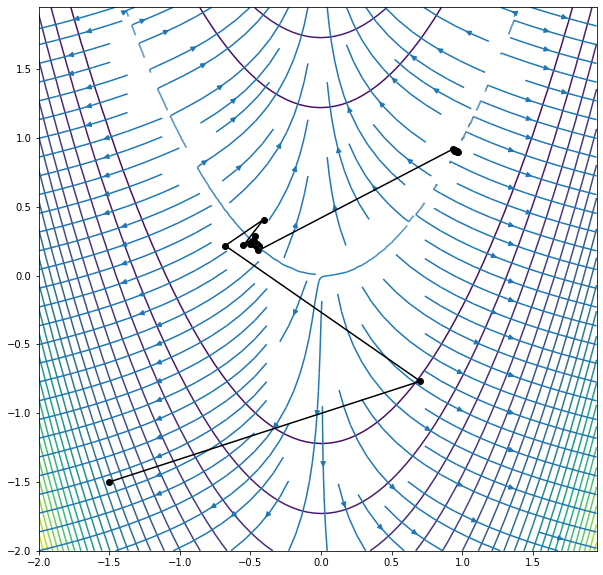

In [30]:
fig = plt.figure()
fig = plt.figure(figsize=(10,10))
x0 = np.asarray((-1.5, -1.5))
points, minimum = gradient_descend_2d_auto_v2(f_ros, grad_f_ros, x0)
X, Y, _ = generate_grid(f_ros)
plot_gradient_descend_2d(f_ros, grad_f_ros, X, Y, points, minimum, fig)
print(minimum)

### Newton descent method

24
Iterations:  23
Minimum:  [1. 1.]


<Figure size 432x288 with 0 Axes>

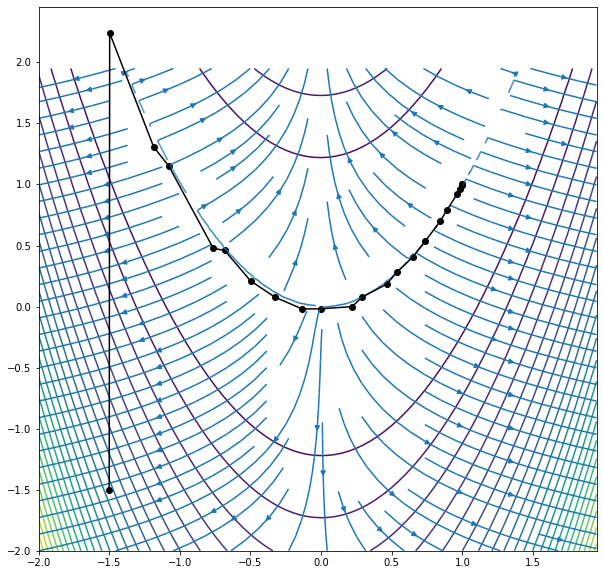

In [31]:
x0 = np.asarray([-1.5, -1.5])
points, minimum = gradient_descend_2d_auto_newton(f_ros, grad_f_ros, x0, hessian_ros, initial_alpha=1)
print ("Minimum: ", np.round(minimum,3))
fig = plt.figure()
fig = plt.figure(figsize=(10,10))
X, Y, _ = generate_grid(f_ros)
plot_gradient_descend_2d(f_ros, grad_f_ros, X, Y, points, minimum, fig)

###### Q: How does Newton perform here?
###### A: Newton method performs quite well as it reaches to the minimum of the function within 24 iterations

### 2.3.2 Newton-gradient descent method

25
Iterations:  24
Minimum:  [1. 1.]


<Figure size 432x288 with 0 Axes>

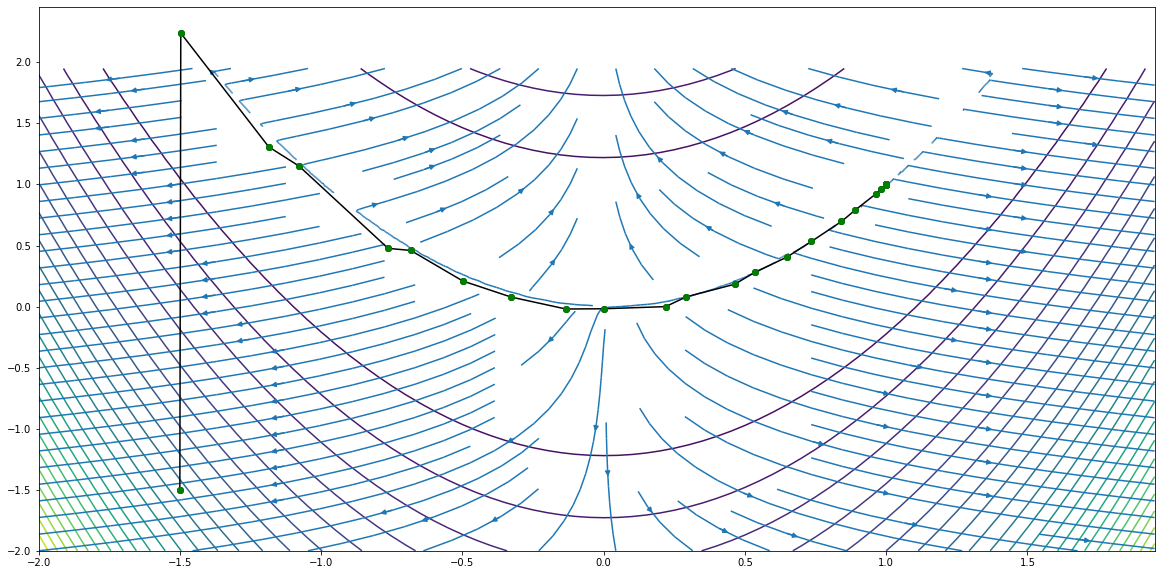

In [32]:
x0 = np.asarray([-1.5, -1.5])
points, minimum, d = gradient_descend_2d_auto_hessian(f_ros, grad_f_ros, x0, hessian_ros, initial_alpha=1)
print ("Minimum: ", np.round(minimum,3))
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
X, Y, _ = generate_grid(f_ros)
plot_gradient_descend_2d_v2(f_ros, grad_f_ros, X, Y, points, minimum, d, fig)

###### With Newton-gradient descent method, it reaches to the minimum of the valley within 24 iterations. We can see that it only uses the Newton descent method. In the image, we can see which method is used at each iteration.

###### In conclusion, we can see that Newton descent method, in general, it requires less iteration than gradient descent method. But computationally, Newton descent method has higher cost than gradient descent method. Moreover, the Newton descent method requiered that the Hessian matrix to be positive definite in order to reach to the minimum (maybe local) of the function. Newton's method will fail in cases where the derivative is zero. When the derivative is close to zero, the tangent line is nearly horizontal and hence may overshoot the desired root (numerical difficulties). We can say Newton's method is always better than the gradient descent to minimize our function. But, in some cases the gradient descent may be good enough for the problem to be solved.